<a href="https://colab.research.google.com/github/BuiDaoGiaHuy/CS114.K21/blob/master/DoAnML_FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=35da1309a8feb261a41b769fea5a3d3741787bc7c7e2b6def26fa51f23911011
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import cv2
import os
import face_recognition
import pickle

In [ ]:
img_size=50

Train

In [ ]:
X_train=[]
Y_train=[]
path_train='/content/drive/My Drive/ML/Train'
i=0
for folder in os.listdir(path_train):
  for file in os.listdir(path_train+'/'+folder):
    img=cv2.imread(path_train+'/'+folder+'/'+file)
    img=cv2.resize(img, (img_size,img_size))
    img_enc=face_recognition.face_encodings(img)
    if(len(img_enc)!=0):
      X_train.append(img_enc[0])
      Y_train.append(folder)
      print(i)
      i+=1

In [ ]:
pickle.dump(X_train, open('/content/drive/My Drive/x_fc_train.pkl', 'wb'))
pickle.dump(Y_train, open('/content/drive/My Drive/y_fc_train.pkl', 'wb'))

Test

In [ ]:
X_test=[]
Y_test=[]
path_test='/content/drive/My Drive/ML/Test'
i=0
for folder in os.listdir(path_test):
  for file in os.listdir(path_test+'/'+folder):
    img=cv2.imread(path_test+'/'+folder+'/'+file)
    img=cv2.resize(img, (img_size,img_size))
    img_enc=face_recognition.face_encodings(img)
    if(len(img_enc)!=0):
      X_test.append(img_enc[0])
      Y_test.append(folder)
      print(i)
      i+=1

In [ ]:
pickle.dump(X_test, open('/content/drive/My Drive/x_fc_test.pkl','wb'))
pickle.dump(Y_test, open('/content/drive/My Drive/y_fc_test.pkl', 'wb'))

In [ ]:
from sklearn.metrics import classification_report

SVM

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear').fit(X_train, Y_train)

y_pre=svm.predict(X_test)
print(classification_report(Y_test, y_pre))

              precision    recall  f1-score   support

        Amee       1.00      0.95      0.97        20
         MTP       1.00      0.94      0.97        17
       MyTam       0.94      0.94      0.94        17
        NDLN       0.89      1.00      0.94        17
   TranThanh       1.00      1.00      1.00        19

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(X_train, Y_train)

y_pre=LR.predict(X_test)
print(classification_report(Y_test, y_pre))

              precision    recall  f1-score   support

        Amee       1.00      0.95      0.97        20
         MTP       1.00      1.00      1.00        17
       MyTam       1.00      0.94      0.97        17
        NDLN       0.89      1.00      0.94        17
   TranThanh       1.00      1.00      1.00        19

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)

y_pred=neigh.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

        Amee       0.95      0.95      0.95        20
         MTP       1.00      0.94      0.97        17
       MyTam       1.00      0.88      0.94        17
        NDLN       0.85      1.00      0.92        17
   TranThanh       1.00      1.00      1.00        19

    accuracy                           0.96        90
   macro avg       0.96      0.95      0.96        90
weighted avg       0.96      0.96      0.96        90



Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

y_pred=clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

        Amee       0.72      0.65      0.68        20
         MTP       1.00      0.76      0.87        17
       MyTam       0.74      0.82      0.78        17
        NDLN       0.61      0.65      0.63        17
   TranThanh       0.82      0.95      0.88        19

    accuracy                           0.77        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.78      0.77      0.77        90



Demo

In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 100kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=424bd9d6d0276464201ae5847092d85ca809bf7493e92355002112a1d98d52e9
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
import pickle
import cv2
import dlib
import face_recognition
from google.colab.patches import cv2_imshow

In [4]:
def demo(path):
  img=cv2.imread(path)
  hog_face_detector = dlib.get_frontal_face_detector()
  faces_hog = hog_face_detector(img, 1)
  for face in faces_hog:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
  new_img=img[y:y+h, x:x+w]
  img_enc=face_recognition.face_encodings(new_img)[0]
  LR=pickle.load(open('/content/drive/My Drive/fc data/LR_fc.pkl', 'rb'))
  name=LR.predict(img_enc.reshape(1,-1))[0]
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(img, name,(x-5,y-10), font, 1, (200,255,155),2)
  cv2_imshow(img)

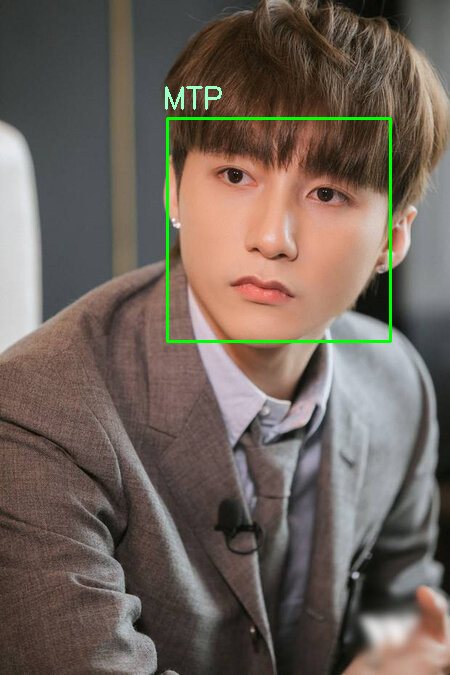

In [5]:
demo('/content/son-tung-mtp-lo-anh-dung-do-doi-voi-thieu-bao-tram-9-15848102443021860636400.jpg')